In [1]:
import pandas as pd
import numpy as np
from datetime import *
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm
import math

In [2]:
df=pd.read_csv('Solar Generation DataSet.csv')

In [3]:
df.head()

,Year,Month,Day,Hour,Minute,Clearsky DHI,Clearsky DNI,Clearsky GHI,Cloud Type,Dew Point,Temperature,Pressure,Relative Humidity,Solar Zenith Angle,Precipitable Water,Wind Direction,Wind Speed,Fill Flag
0,2009,1,1,0,0,0,0,0,0,0.0,5.0,1010,75.34,106.15,0.499,346.1,3.1,0
1,2009,1,1,0,30,0,0,0,0,1.0,5.0,1010,80.81,112.28,0.490,346.1,3.1,0
2,2009,1,1,1,0,0,0,0,4,0.0,5.0,1010,78.27,118.50,0.482,347.9,3.2,0
3,2009,1,1,1,30,0,0,0,4,0.0,4.0,1010,78.27,124.78,0.478,347.9,3.1,0
4,2009,1,1,2,0,0,0,0,4,0.0,4.0,1010,76.45,131.12,0.475,350.0,3.0,0


In [4]:
col = ['year','month','day','hour','minute','DHI','DNI','GHI','Cloud_type','dew'
       ,'temperature','pressure','RH','zenith','prep','wind_dir','wind_speed','flag']
df.columns = col

In [5]:
df.head()

,year,month,day,hour,minute,DHI,DNI,GHI,Cloud_type,dew,temperature,pressure,RH,zenith,prep,wind_dir,wind_speed,flag
0,2009,1,1,0,0,0,0,0,0,0.0,5.0,1010,75.34,106.15,0.499,346.1,3.1,0
1,2009,1,1,0,30,0,0,0,0,1.0,5.0,1010,80.81,112.28,0.490,346.1,3.1,0
2,2009,1,1,1,0,0,0,0,4,0.0,5.0,1010,78.27,118.50,0.482,347.9,3.2,0
3,2009,1,1,1,30,0,0,0,4,0.0,4.0,1010,78.27,124.78,0.478,347.9,3.1,0
4,2009,1,1,2,0,0,0,0,4,0.0,4.0,1010,76.45,131.12,0.475,350.0,3.0,0


In [6]:
#Converting column values to string
def int_str(df,col):
    df[col] = df[col].astype('str')
    return df

## Count Function
def count_func(df,col):
    categories = df[col].dropna().unique()
    data = {}
    for cat in categories:
        data[cat] = len(df[df[col]==cat])
    data = pd.DataFrame(data,index=[0]).T
    data.columns = [col]
#     print(data)
    return data

In [7]:
for colm in ['year','month','day','hour','minute']:
    df = int_str(df,colm)

In [8]:
df

,year,month,day,hour,minute,DHI,DNI,GHI,Cloud_type,dew,temperature,pressure,RH,zenith,prep,wind_dir,wind_speed,flag
0,2009,1,1,0,0,0,0,0,0,0.0,5.0,1010,75.34,106.15,0.499,346.1,3.1,0
1,2009,1,1,0,30,0,0,0,0,1.0,5.0,1010,80.81,112.28,0.490,346.1,3.1,0
2,2009,1,1,1,0,0,0,0,4,0.0,5.0,1010,78.27,118.50,0.482,347.9,3.2,0
3,2009,1,1,1,30,0,0,0,4,0.0,4.0,1010,78.27,124.78,0.478,347.9,3.1,0
4,2009,1,1,2,0,0,0,0,4,0.0,4.0,1010,76.45,131.12,0.475,350.0,3.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
175291,2018,12,31,21,30,51,555,168,4,19.4,20.8,1008,91.77,77.86,3.700,204.0,3.5,100
175292,2018,12,31,22,0,37,388,84,4,19.1,20.1,1008,93.88,83.03,3.800,209.0,3.2,100
175293,2018,12,31,22,30,15,115,18,7,19.1,19.6,1008,96.83,88.32,3.800,208.0,2.6,57
175294,2018,12,31,23,0,0,0,0,7,18.7,19.2,1009,96.84,94.34,3.700,206.0,2.1,0


In [9]:
df['datetime'] = df['year']+'-'+df['month']+'-'+df['day']+' '+df['hour']+':'+df['minute']

In [10]:
df.head()

,year,month,day,hour,minute,DHI,DNI,GHI,Cloud_type,dew,temperature,pressure,RH,zenith,prep,wind_dir,wind_speed,flag,datetime
0,2009,1,1,0,0,0,0,0,0,0.0,5.0,1010,75.34,106.15,0.499,346.1,3.1,0,2009-1-1 0:0
1,2009,1,1,0,30,0,0,0,0,1.0,5.0,1010,80.81,112.28,0.490,346.1,3.1,0,2009-1-1 0:30
2,2009,1,1,1,0,0,0,0,4,0.0,5.0,1010,78.27,118.50,0.482,347.9,3.2,0,2009-1-1 1:0
3,2009,1,1,1,30,0,0,0,4,0.0,4.0,1010,78.27,124.78,0.478,347.9,3.1,0,2009-1-1 1:30
4,2009,1,1,2,0,0,0,0,4,0.0,4.0,1010,76.45,131.12,0.475,350.0,3.0,0,2009-1-1 2:0


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 175296 entries, 0 to 175295
Data columns (total 19 columns):
year           175296 non-null object
month          175296 non-null object
day            175296 non-null object
hour           175296 non-null object
minute         175296 non-null object
DHI            175296 non-null int64
DNI            175296 non-null int64
GHI            175296 non-null int64
Cloud_type     175296 non-null int64
dew            175296 non-null float64
temperature    175296 non-null float64
pressure       175296 non-null int64
RH             175296 non-null float64
zenith         175296 non-null float64
prep           175296 non-null float64
wind_dir       175296 non-null float64
wind_speed     175296 non-null float64
flag           175296 non-null int64
datetime       175296 non-null object
dtypes: float64(7), int64(6), object(6)
memory usage: 25.4+ MB


In [12]:
df['datetime'] = pd.to_datetime(df['datetime']) #converting datetime object into datetime format 
df['datetime'] = df['datetime']-timedelta(hours=5,minutes=30)

In [13]:
df.head()

,year,month,day,hour,minute,DHI,DNI,GHI,Cloud_type,dew,temperature,pressure,RH,zenith,prep,wind_dir,wind_speed,flag,datetime
0,2009,1,1,0,0,0,0,0,0,0.0,5.0,1010,75.34,106.15,0.499,346.1,3.1,0,2008-12-31 18:30:00
1,2009,1,1,0,30,0,0,0,0,1.0,5.0,1010,80.81,112.28,0.490,346.1,3.1,0,2008-12-31 19:00:00
2,2009,1,1,1,0,0,0,0,4,0.0,5.0,1010,78.27,118.50,0.482,347.9,3.2,0,2008-12-31 19:30:00
3,2009,1,1,1,30,0,0,0,4,0.0,4.0,1010,78.27,124.78,0.478,347.9,3.1,0,2008-12-31 20:00:00
4,2009,1,1,2,0,0,0,0,4,0.0,4.0,1010,76.45,131.12,0.475,350.0,3.0,0,2008-12-31 20:30:00


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 175296 entries, 0 to 175295
Data columns (total 19 columns):
year           175296 non-null object
month          175296 non-null object
day            175296 non-null object
hour           175296 non-null object
minute         175296 non-null object
DHI            175296 non-null int64
DNI            175296 non-null int64
GHI            175296 non-null int64
Cloud_type     175296 non-null int64
dew            175296 non-null float64
temperature    175296 non-null float64
pressure       175296 non-null int64
RH             175296 non-null float64
zenith         175296 non-null float64
prep           175296 non-null float64
wind_dir       175296 non-null float64
wind_speed     175296 non-null float64
flag           175296 non-null int64
datetime       175296 non-null datetime64[ns]
dtypes: datetime64[ns](1), float64(7), int64(6), object(5)
memory usage: 25.4+ MB


In [15]:
col = ['datetime','DHI','DNI','GHI','Cloud_type','dew','temperature','pressure','RH','zenith','prep','wind_dir','wind_speed','flag']
df = df[col] #selecting only desired columns in particular order

In [16]:
df.head()

,datetime,DHI,DNI,GHI,Cloud_type,dew,temperature,pressure,RH,zenith,prep,wind_dir,wind_speed,flag
0,2008-12-31 18:30:00,0,0,0,0,0.0,5.0,1010,75.34,106.15,0.499,346.1,3.1,0
1,2008-12-31 19:00:00,0,0,0,0,1.0,5.0,1010,80.81,112.28,0.490,346.1,3.1,0
2,2008-12-31 19:30:00,0,0,0,4,0.0,5.0,1010,78.27,118.50,0.482,347.9,3.2,0
3,2008-12-31 20:00:00,0,0,0,4,0.0,4.0,1010,78.27,124.78,0.478,347.9,3.1,0
4,2008-12-31 20:30:00,0,0,0,4,0.0,4.0,1010,76.45,131.12,0.475,350.0,3.0,0


In [17]:
index_start_date = pd.to_datetime(df.datetime.min()).date()
index_end_date = pd.to_datetime(df.datetime.max()+timedelta(days=1)).date()
df.set_index('datetime', inplace = True)
df = df.reindex(pd.date_range(index_start_date, index_end_date, freq='30T', closed='left')) #reindexing
df.insert(loc = 0, column = 'datetime', value = df.index) #inserting column at specific index
df.reset_index(inplace = True, drop = True)

In [18]:
df.dropna(inplace=True)

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 175296 entries, 37 to 175332
Data columns (total 14 columns):
datetime       175296 non-null datetime64[ns]
DHI            175296 non-null float64
DNI            175296 non-null float64
GHI            175296 non-null float64
Cloud_type     175296 non-null float64
dew            175296 non-null float64
temperature    175296 non-null float64
pressure       175296 non-null float64
RH             175296 non-null float64
zenith         175296 non-null float64
prep           175296 non-null float64
wind_dir       175296 non-null float64
wind_speed     175296 non-null float64
flag           175296 non-null float64
dtypes: datetime64[ns](1), float64(13)
memory usage: 20.1 MB


### Analysis Flag Column

In [20]:
col = 'flag'
df[col]

37          0.0
38          0.0
39          0.0
40          0.0
41          0.0
          ...  
175328    100.0
175329    100.0
175330     57.0
175331      0.0
175332      0.0
Name: flag, Length: 175296, dtype: float64

In [21]:
print('Unique Values \n',df['flag'].unique())
print('Total Unique Values : ',df['flag'].nunique())

Unique Values 
 [  0.   4.   3.   1.  14.  96. 100.  61.  29.  68.  32.  18.  57.  71.
  25.  39.  36.  64.  50.  86.  82.  11.  21.   7.  43.  46.  93.  89.
  75.  79.  54.]
Total Unique Values :  31


In [22]:
df_col = count_func(df,col)
df_col = df_col.sort_index()
df_col

,flag
0.0,164285
1.0,2046
3.0,290
4.0,6864
7.0,93
11.0,60
14.0,204
18.0,46
21.0,34
25.0,48


In [23]:
df.loc[~((df[col] >0) & (df[col] <7)), col] = np.nan

In [24]:
df_col = count_func(df,col)
df_col = df_col.sort_index()
df_col

,flag
1.0,2046
3.0,290
4.0,6864


In [25]:
print('Percentage of nan values in column',col,'is :',df[col].isna().sum()/len(df)*100)

Percentage of nan values in column flag is : 94.75173420956553


In [26]:
df.drop('flag',axis=1,inplace=True)
print(df.columns)

Index(['datetime', 'DHI', 'DNI', 'GHI', 'Cloud_type', 'dew', 'temperature',
       'pressure', 'RH', 'zenith', 'prep', 'wind_dir', 'wind_speed'],
      dtype='object')


### Wind Speed Analysis

In [27]:
col = 'wind_speed'
df[col]

37        3.1
38        3.1
39        3.2
40        3.1
41        3.0
         ... 
175328    3.5
175329    3.2
175330    2.6
175331    2.1
175332    2.1
Name: wind_speed, Length: 175296, dtype: float64

In [28]:
print('Percentage of nan values in column',col,'is :',df[col].isna().sum()/len(df)*100)

Percentage of nan values in column wind_speed is : 0.0


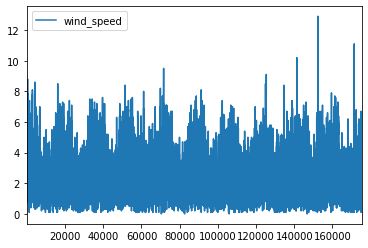

In [29]:
df.plot(y=col)

### looking for outlier

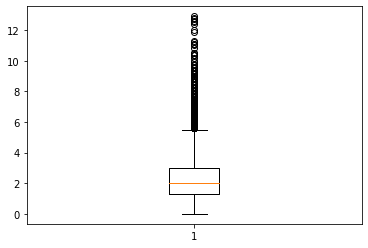

In [30]:
plt.boxplot(list(df[col]))
plt.show()

In [31]:
#Removing Outliers using IQR method : Inter Quartile Range
def value_limiter(series):
    Q1,Q3 = np.percentile(series , [25,75])
    IQR = Q3-Q1
    lower_range = Q1-(1.5 * IQR)
    upper_range = Q3+(1.5 * IQR)
    print(f'Upper Limit : {round(upper_range,2)} & Lower Limit : {round(lower_range,2)}')
    return upper_range, lower_range

def outlier_remove(train_df,col, upper_limit, lower_limit):
    df = train_df.copy()
    df.loc[~((df[col]>=lower_limit)&(df[col]<=upper_limit)),col] = np.nan
    return df

In [32]:
upper_limit, lower_limit = value_limiter(df[col])
df = outlier_remove(df,col, upper_limit, lower_limit)

Upper Limit : 5.55 & Lower Limit : -1.25


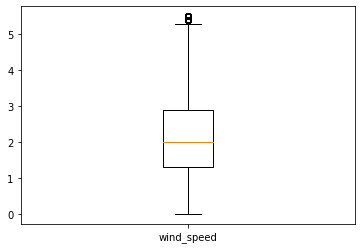

In [33]:
plt.boxplot(list(df[col][~np.isnan(df[col])]),labels = [col]) #if df has na values then matplot will show error while plotting
plt.show()

In [34]:
print('Percentage of nan values in column',col,'after removing outliers is :',round(df[col].isna().sum()/len(df)*100,2),'%')

Percentage of nan values in column wind_speed after removing outliers is : 2.08 %


In [37]:
df.plot(y=col,x='datetime',ylabel='Wind Speed',xlabel='datetime')

AttributeError: 'Line2D' object has no property 'ylabel'

Error in callback <function install_repl_displayhook.<locals>.post_execute at 0x00000287C7B17558> (for post_execute):


ValueError: year 43199 is out of range

ValueError: year 43199 is out of range

### Distribution

AttributeError: 'Line2D' object has no property 'bw_method'

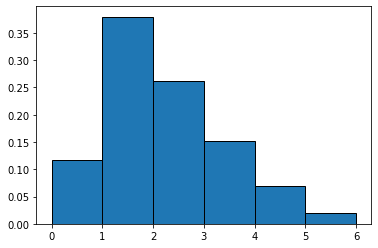

In [40]:
plt.hist(list(df[col][~np.isnan(df[col])]),bins=[0,1,2,3,4,5,6],density=True,edgecolor='black') #Histogram plot
sns.kdeplot(list(df[col][~np.isnan(df[col])]),bw_method = .28) #density plot

plt.title('Bucketing Windspeed')
plt.xlabel("WindSpeed Bins") #adding xlabel
plt.ylabel('Frequency/Counts') #adding ylabel
plt.show()

### Wind direction Analysis

In [41]:
col = 'wind_dir'
df[col]

37        346.1
38        346.1
39        347.9
40        347.9
41        350.0
          ...  
175328    204.0
175329    209.0
175330    208.0
175331    206.0
175332    206.0
Name: wind_dir, Length: 175296, dtype: float64

In [42]:
print('Percentage of nan values in column',col,'is :',df[col].isna().sum()/len(df)*100)

Percentage of nan values in column wind_dir is : 0.0


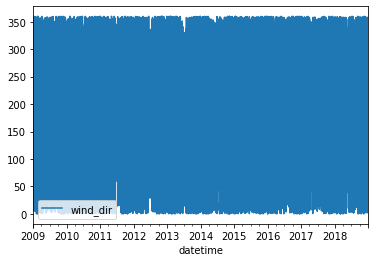

In [43]:
df.plot(y=col,x='datetime')

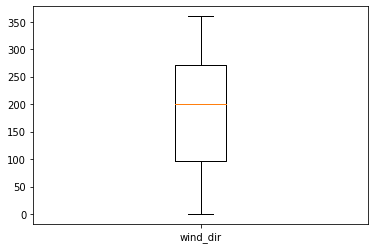

In [44]:
plt.boxplot(list(df[col]),labels = [col])
plt.show()

AttributeError: 'Line2D' object has no property 'bw_method'

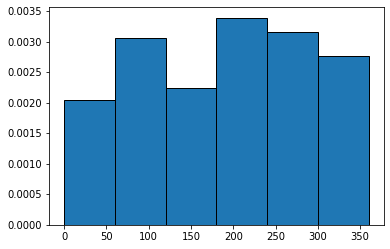

In [45]:
plt.hist(list(df[col]),bins=[0,60,120,180,240,300,360],density=True,edgecolor='black') #Histogram plot
sns.kdeplot(list(df[col]),bw_method = .28) #density plot

plt.title('Bucketing Windspeed')
plt.xlabel("WindSpeed Bins") #adding xlabel
plt.ylabel('Frequency/Counts') #adding ylabel
plt.show()

### Precipitable Water Analysis

In [46]:
col = 'prep'
df[col]

37        0.499
38        0.490
39        0.482
40        0.478
41        0.475
          ...  
175328    3.700
175329    3.800
175330    3.800
175331    3.700
175332    3.700
Name: prep, Length: 175296, dtype: float64

In [47]:
print('Percentage of nan values in column',col,'is :',df[col].isna().sum()/len(df)*100)

Percentage of nan values in column prep is : 0.0


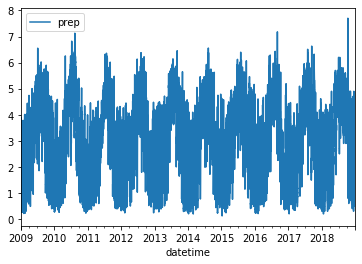

In [48]:
df.plot(y=col,x='datetime')

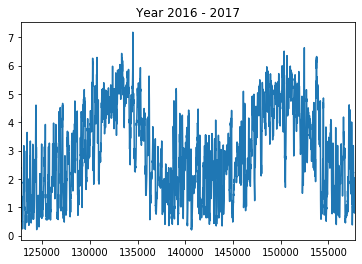

In [49]:
df.loc[df.datetime.dt.year.isin([2016,2017]),col].plot(y=col, title='Year 2016 - 2017')

### Analyzing Solar Zenith Angle

In [50]:
col = 'zenith'
df[col]

37        106.15
38        112.28
39        118.50
40        124.78
41        131.12
           ...  
175328     77.86
175329     83.03
175330     88.32
175331     94.34
175332    100.22
Name: zenith, Length: 175296, dtype: float64

In [51]:
#Converting zenith angle to cos values
col = 'cosz'
df[col] = df['zenith'].apply(lambda x: math.cos(math.radians(x)))

In [52]:
print('Percentage of nan values in column',col,'is :',df[col].isna().sum()/len(df)*100)

Percentage of nan values in column cosz is : 0.0


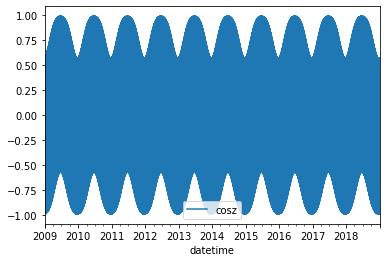

In [53]:
df.plot(y=col,x='datetime')

### Observation:
There is some kind of pattern.

Lets breakdown this analysis into:

Year
Month
Day

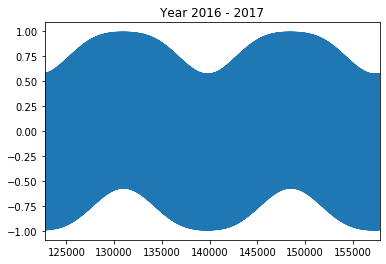

In [54]:
#Year
df.loc[df.datetime.dt.year.isin([2016,2017]),col].plot(y=col, title='Year 2016 - 2017')

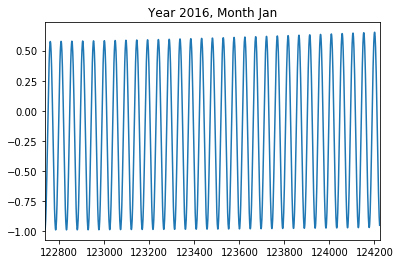

In [55]:
#Month
df.loc[(df.datetime.dt.year==2016)&(df.datetime.dt.month==1),col].plot(y=col, title='Year 2016, Month Jan')

In [56]:
#Day
df1 = df.copy()
df1.set_index('datetime',inplace=True)
df1.loc[df1.index.date == datetime(2016,1,1).date(),col].plot(y=col,ylabel='cos(zenith)', title='Date 2016-Jan-01')

AttributeError: 'Line2D' object has no property 'ylabel'

Error in callback <function install_repl_displayhook.<locals>.post_execute at 0x00000287C7B17558> (for post_execute):


ValueError: year 43199 is out of range

ValueError: year 43199 is out of range

### Analyzing Relative Humidity

In [57]:
col = 'RH'
df[col]

37        75.34
38        80.81
39        78.27
40        78.27
41        76.45
          ...  
175328    91.77
175329    93.88
175330    96.83
175331    96.84
175332    96.84
Name: RH, Length: 175296, dtype: float64

In [58]:
print('Percentage of nan values in column',col,'is :',df[col].isna().sum()/len(df)*100)

Percentage of nan values in column RH is : 0.0


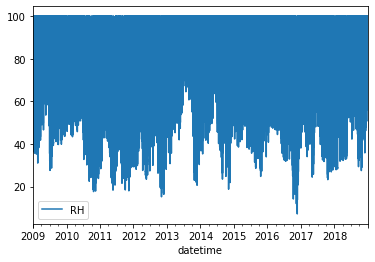

In [59]:
df.plot(y=col,x='datetime')

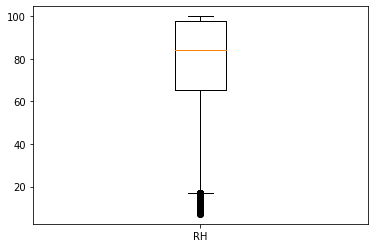

In [60]:
plt.boxplot(list(df[col]),labels = [col])
plt.show()

### Looking for outlier

In [61]:
upper_limit, lower_limit = value_limiter(df[col])
df = outlier_remove(df,col, upper_limit, lower_limit)

Upper Limit : 146.49 & Lower Limit : 17.05


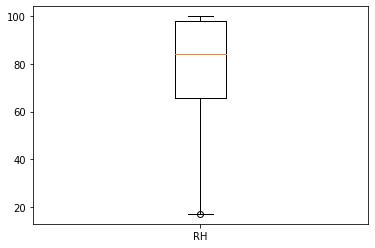

In [62]:
plt.boxplot(list(df[col][~np.isnan(df[col])]),labels = [col]) #if df has na values then matplot will show error while plotting
plt.show()

In [63]:
print('Percentage of nan values in column',col,'after removing outliers is :',round(df[col].isna().sum()/len(df)*100,2),'%')

Percentage of nan values in column RH after removing outliers is : 0.05 %


D:\anaconda\lib\site-packages\statsmodels\nonparametric\kde.py:447: RuntimeWarning: invalid value encountered in greater
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.
D:\anaconda\lib\site-packages\statsmodels\nonparametric\kde.py:447: RuntimeWarning: invalid value encountered in less
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.


AttributeError: 'Line2D' object has no property 'bw_method'

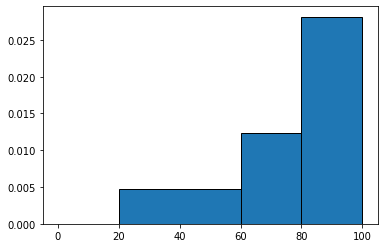

In [64]:
plt.hist(list(df[col]),bins=[0,20,60,80,100],density=True,edgecolor='black') #Histogram plot
sns.kdeplot(list(df[col]),bw_method = .28) #density plot

plt.title('Bucketing Relative Humidity')
plt.xlabel("RH Bins") #adding xlabel
plt.ylabel('Frequency/Counts') #adding ylabel
plt.show()

### Analysis Pressure

In [65]:
col = 'pressure'
df[col]

37        1010.0
38        1010.0
39        1010.0
40        1010.0
41        1010.0
           ...  
175328    1008.0
175329    1008.0
175330    1008.0
175331    1009.0
175332    1009.0
Name: pressure, Length: 175296, dtype: float64

In [66]:
print('Percentage of nan values in column',col,'is :',df[col].isna().sum()/len(df)*100)

Percentage of nan values in column pressure is : 0.0


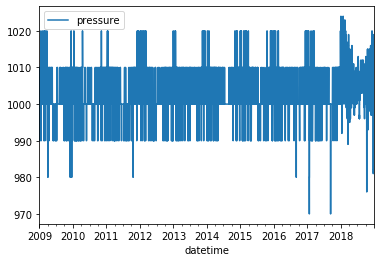

In [67]:
df.plot(y=col,x='datetime')

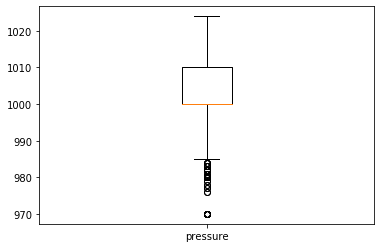

In [68]:
plt.boxplot(list(df[col]),labels = [col])
plt.show()

### Looking for outlier

In [69]:
upper_limit, lower_limit = value_limiter(df[col])
df = outlier_remove(df,col, upper_limit, lower_limit)

Upper Limit : 1025.0 & Lower Limit : 985.0


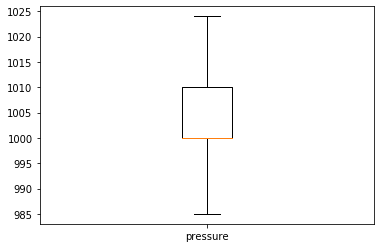

In [70]:
plt.boxplot(list(df[col][~np.isnan(df[col])]),labels = [col]) #if df has na values then matplot will show error while plotting
plt.show()

In [71]:
print('Percentage of nan values in column',col,'after removing outliers is :',round(df[col].isna().sum()/len(df)*100,2),'%')

Percentage of nan values in column pressure after removing outliers is : 0.09 %


D:\anaconda\lib\site-packages\statsmodels\nonparametric\kde.py:447: RuntimeWarning: invalid value encountered in greater
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.
D:\anaconda\lib\site-packages\statsmodels\nonparametric\kde.py:447: RuntimeWarning: invalid value encountered in less
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.


AttributeError: 'Line2D' object has no property 'bw_method'

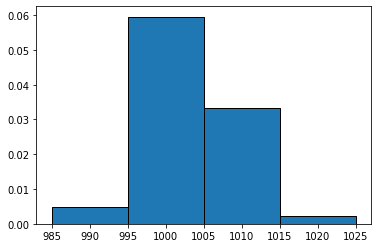

In [72]:
bin_list = [985,995,1005,1015,1025]
plt.hist(list(df[col]),bins=bin_list,density=True,edgecolor='black') #Histogram plot
sns.kdeplot(list(df[col]),bw_method = .28) #density plot

plt.title('Bucketing Relative Humidity')
plt.xlabel("RH Bins") #adding xlabel
plt.ylabel('Frequency/Counts') #adding ylabel
plt.show()

### Summed Analysis

In [73]:
df.corr()

,DHI,DNI,GHI,Cloud_type,dew,temperature,pressure,RH,zenith,prep,wind_dir,wind_speed,cosz
DHI,1.000000,0.860988,0.912991,0.022479,0.222931,0.503409,-0.093055,-0.560858,-0.873421,0.207504,-0.000195,0.311712,0.882926
DNI,0.860988,1.000000,0.927926,-0.073302,0.033601,0.384353,0.005713,-0.680262,-0.886323,-0.002180,0.006256,0.380965,0.908228
GHI,0.912991,0.927926,1.000000,-0.047297,0.140420,0.478273,-0.051795,-0.656203,-0.891033,0.108725,0.004944,0.348084,0.892810
Cloud_type,0.022479,-0.073302,-0.047297,1.000000,0.202096,0.066777,-0.136663,0.235177,0.026873,0.326904,-0.081565,0.055077,-0.027521
dew,0.222931,0.033601,0.140420,0.202096,1.000000,0.848948,-0.421640,0.190176,-0.222336,0.881881,-0.076357,-0.141090,0.199838
temperature,0.503409,0.384353,0.478273,0.066777,0.848948,1.000000,-0.374754,-0.342401,-0.526548,0.742449,-0.066673,-0.041335,0.509742
pressure,-0.093055,0.005713,-0.051795,-0.136663,-0.421640,-0.374754,1.000000,-0.082359,0.080596,-0.366330,-0.183845,-0.053256,-0.069666
RH,-0.560858,-0.680262,-0.656203,0.235177,0.190176,-0.342401,-0.082359,1.000000,0.607546,0.181107,-0.018629,-0.179365,-0.617479
zenith,-0.873421,-0.886323,-0.891033,0.026873,-0.222336,-0.526548,0.080596,0.607546,1.000000,-0.182529,0.003802,-0.294553,-0.995564
prep,0.207504,-0.002180,0.108725,0.326904,0.881881,0.742449,-0.366330,0.181107,-0.182529,1.000000,-0.105735,-0.113192,0.161829


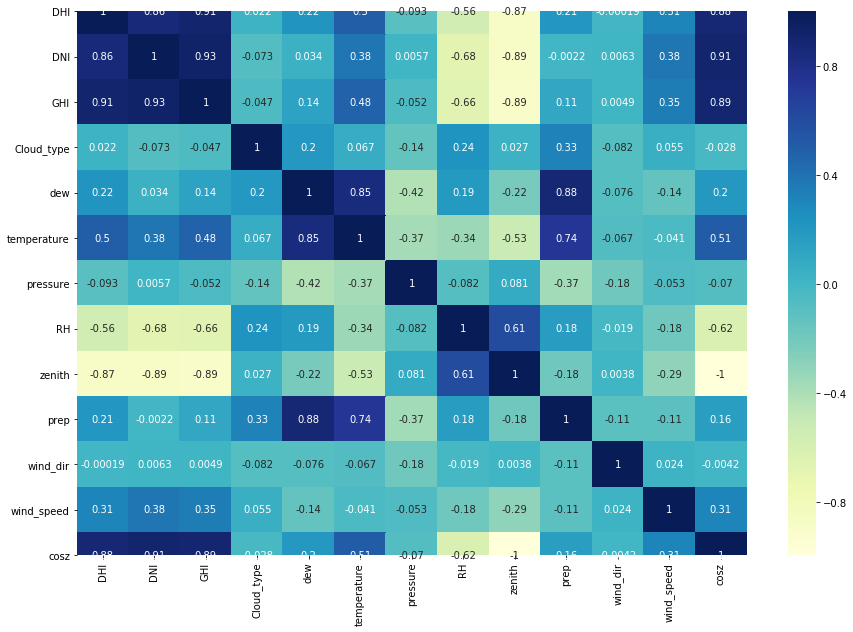

In [74]:
#specify size of heatmap
fig, ax = plt.subplots(figsize=(15, 10))

#plot
sns.heatmap(df.corr(), cmap="YlGnBu", annot=True)

### Scatter Plots

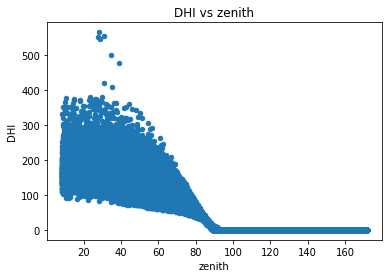

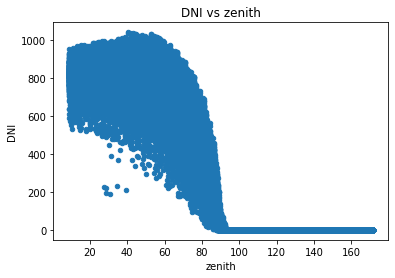

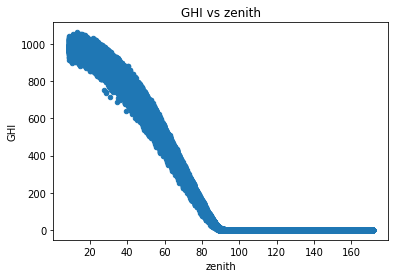

In [75]:
col_anl = 'zenith'
for colm in ['DHI','DNI','GHI']:
    df.plot(x=col_anl,y=colm ,kind='scatter',title=colm+' vs '+col_anl)

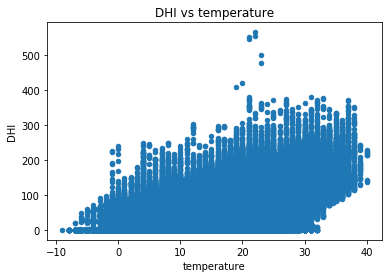

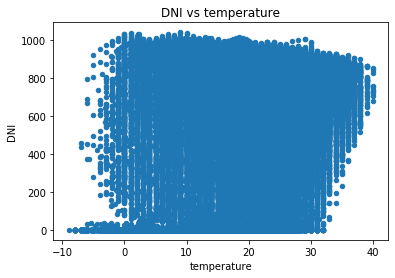

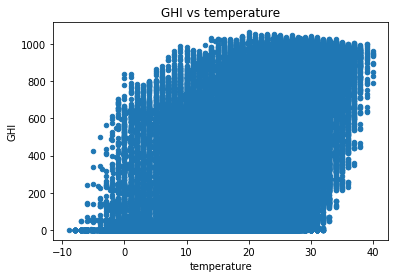

In [76]:
col_anl = 'temperature'
for colm in ['DHI','DNI','GHI']:
    df.plot(x=col_anl,y=colm ,kind='scatter',title=colm+' vs '+col_anl)

### Analysis DHI

In [77]:
col = 'DHI'
df[col]

37         0.0
38         0.0
39         0.0
40         0.0
41         0.0
          ... 
175328    51.0
175329    37.0
175330    15.0
175331     0.0
175332     0.0
Name: DHI, Length: 175296, dtype: float64

In [78]:
print('Percentage of nan values in column',col,'is :',df[col].isna().sum()/len(df)*100)

Percentage of nan values in column DHI is : 0.0


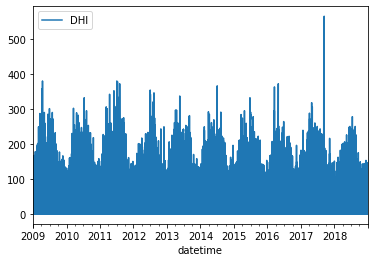

In [79]:
df.plot(y=col,x='datetime')

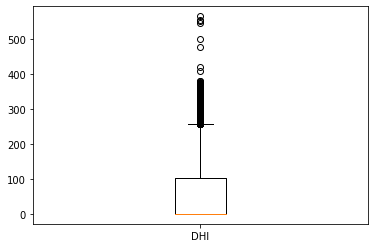

In [80]:
plt.boxplot(list(df[col]),labels = [col])
plt.show()

In [81]:
upper_limit, lower_limit = value_limiter(df[col])
df = outlier_remove(df,col, upper_limit, lower_limit)

Upper Limit : 257.5 & Lower Limit : -154.5


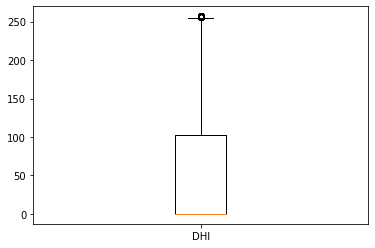

In [82]:
plt.boxplot(list(df[col][~np.isnan(df[col])]),labels = [col]) #if df has na values then matplot will show error while plotting
plt.show()

In [83]:
print('Percentage of nan values in column',col,'after removing outliers is :',round(df[col].isna().sum()/len(df)*100,2),'%')

Percentage of nan values in column DHI after removing outliers is : 0.36 %


D:\anaconda\lib\site-packages\numpy\lib\histograms.py:893: RuntimeWarning: invalid value encountered in true_divide
  return n/db/n.sum(), bin_edges
D:\anaconda\lib\site-packages\statsmodels\nonparametric\kde.py:447: RuntimeWarning: invalid value encountered in greater
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.
D:\anaconda\lib\site-packages\statsmodels\nonparametric\kde.py:447: RuntimeWarning: invalid value encountered in less
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.


AttributeError: 'Line2D' object has no property 'bw_method'

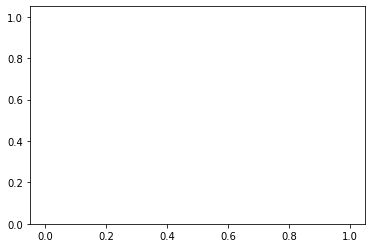

In [84]:
bin_list = [985,995,1005,1015,1025]
plt.hist(list(df[col]),bins=bin_list,density=True,edgecolor='black') #Histogram plot
sns.kdeplot(list(df[col]),bw_method = .28) #density plot

plt.title('Bucketing Relative Humidity')
plt.xlabel("RH Bins") #adding xlabel
plt.ylabel('Frequency/Counts') #adding ylabel
plt.show()

### Analysis Cloud Type

In [85]:
col = 'Cloud_type'
df[col]

37        0.0
38        0.0
39        4.0
40        4.0
41        4.0
         ... 
175328    4.0
175329    4.0
175330    7.0
175331    7.0
175332    7.0
Name: Cloud_type, Length: 175296, dtype: float64

In [86]:
print('Percentage of nan values in column',col,'is :',df[col].isna().sum()/len(df)*100)

Percentage of nan values in column Cloud_type is : 0.0


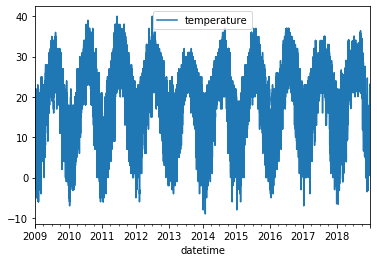

In [92]:
df.plot(y=col,x='datetime')

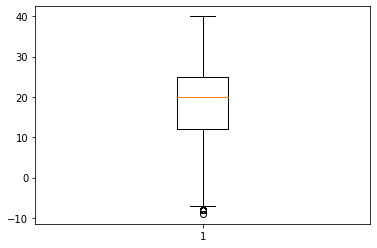

In [93]:
plt.boxplot(list(df[col]))
plt.show()

### Analysis of temperature

In [89]:
col = 'temperature'
df[col]

37         5.0
38         5.0
39         5.0
40         4.0
41         4.0
          ... 
175328    20.8
175329    20.1
175330    19.6
175331    19.2
175332    19.2
Name: temperature, Length: 175296, dtype: float64

In [90]:
print('Percentage of nan values in column',col,'is :',df[col].isna().sum()/len(df)*100)

Percentage of nan values in column temperature is : 0.0


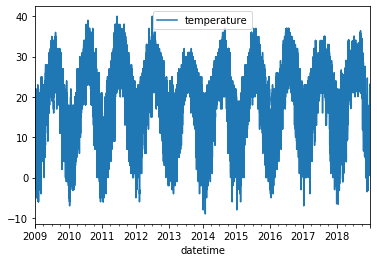

In [96]:
df.plot(y=col,x='datetime')

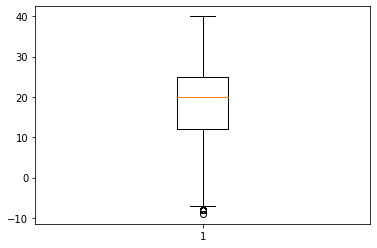

In [97]:
plt.boxplot(list(df[col]))
plt.show()